<a href="https://colab.research.google.com/github/rushik151020/Stock-price-analysis/blob/main/Stock_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
!pip install yfinance
import yfinance as yf

In [ ]:
import yfinance as yf

start = '2015-01-01'
end = '2024-12-31'
df = yf.download('INFY', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,INFY,INFY,INFY,INFY,INFY
Date,,,,,
2015-01-02,6.122774,6.188032,6.076709,6.186113,13401600
2015-01-05,6.046000,6.092065,6.015291,6.078630,10076400
2015-01-06,6.003775,6.084388,5.907806,6.024887,13290800
2015-01-07,6.130452,6.178435,6.022967,6.026806,23202800
2015-01-08,6.163082,6.203388,6.143888,6.151565,14087200


In [ ]:
df=df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,INFY,INFY,INFY,INFY,INFY
0,2015-01-02,6.122774,6.188032,6.076709,6.186113,13401600
1,2015-01-05,6.046000,6.092065,6.015291,6.078630,10076400
2,2015-01-06,6.003775,6.084388,5.907806,6.024887,13290800
3,2015-01-07,6.130452,6.178435,6.022967,6.026806,23202800
4,2015-01-08,6.163082,6.203388,6.143888,6.151565,14087200


In [ ]:
df=df.drop(['Date'],axis=1)
df.head()

<ipython-input-10-7cf5ca49c2dd>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.drop(['Date'],axis=1)


Price,Close,High,Low,Open,Volume
Ticker,INFY,INFY,INFY,INFY,INFY
0,6.122774,6.188032,6.076709,6.186113,13401600
1,6.046000,6.092065,6.015291,6.078630,10076400
2,6.003775,6.084388,5.907806,6.024887,13290800
3,6.130452,6.178435,6.022967,6.026806,23202800
4,6.163082,6.203388,6.143888,6.151565,14087200


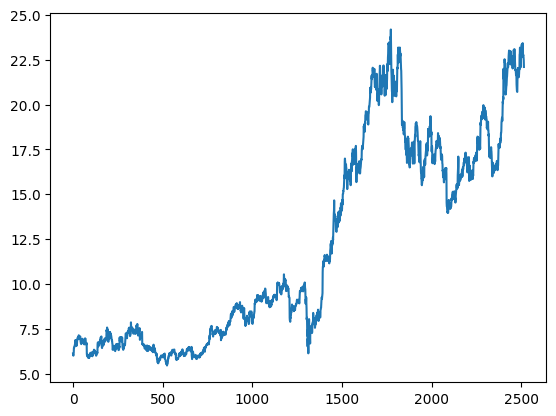

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,INFY
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,22.227006
2511,22.239472
2512,22.260228
2513,22.277506


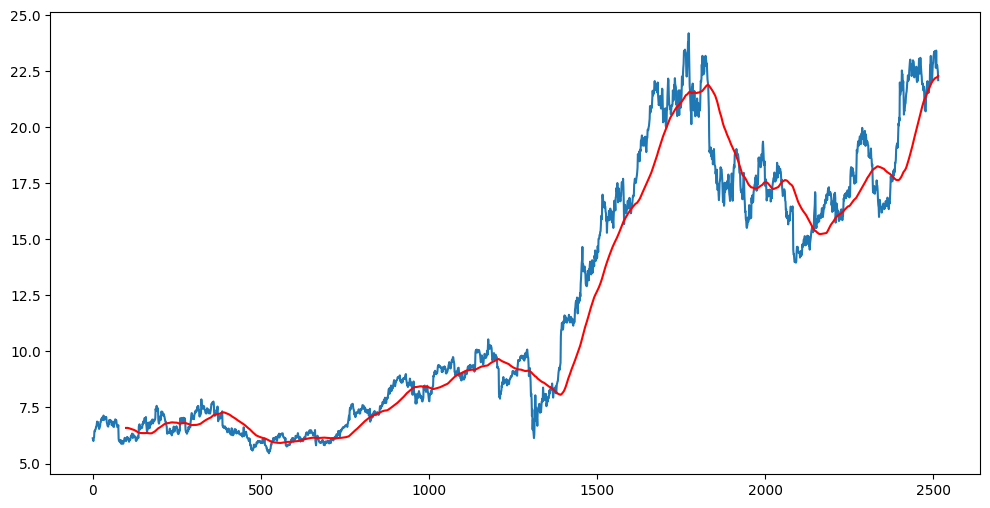

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,INFY
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,20.102319
2511,20.123045
2512,20.142151
2513,20.160603


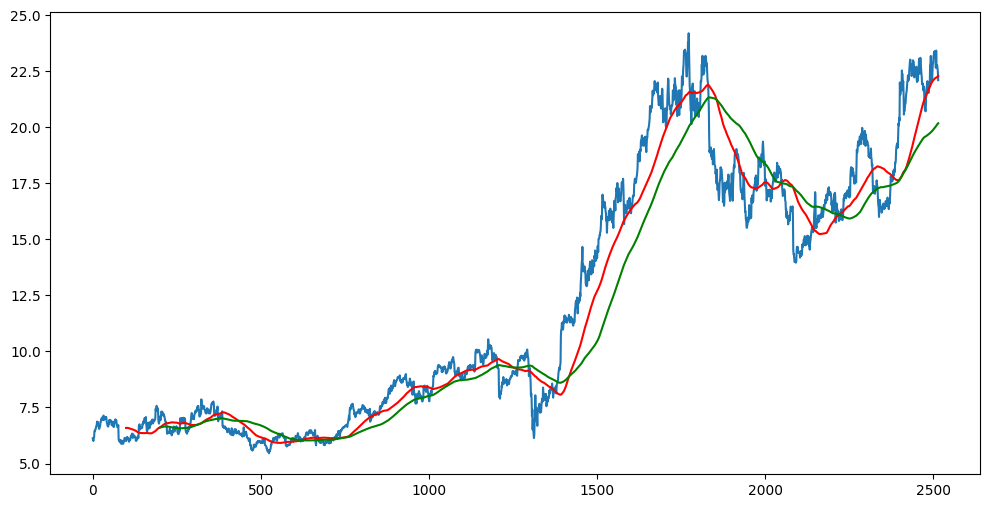

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
#traning and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
data_training.head()

Ticker,INFY
0,6.122774
1,6.046000
2,6.003775
3,6.130452
4,6.163082


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.03716817],
       [0.03288671],
       [0.03053187],
       ...,
       [0.96910507],
       [1.        ],
       [0.99845521]])

In [ ]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#ML model

In [ ]:
#Corrected import statements

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential



In [ ]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))




/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 279ms/step - loss: 0.0552
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/step - loss: 0.0042
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 279ms/step - loss: 0.0039
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 280ms/step - loss: 0.0041
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/step - loss: 0.0037
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 280ms/step - loss: 0.0038
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 281ms/step - loss: 0.0035
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/step - loss: 0.0040
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 316ms/step - loss: 0.0033
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 284ms/step - loss: 0.0033
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 281ms/step - loss: 0.0033
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 281ms/step - loss: 0.0027
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 301ms/step - loss: 0.0035
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 330ms/step - loss: 0.0028
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [ ]:
model.save('keras_model.h5')

In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df.head()

Ticker,INFY
0,20.878258
1,20.942329
2,20.850798
3,21.043015
4,21.345068


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.67623626],
       [0.68249796],
       [0.6735526 ],
       [0.69233788],
       [0.72185743],
       [0.7495877 ],
       [0.7290135 ],
       [0.743326  ],
       [0.73617012],
       [0.74243145],
       [0.77195082],
       [0.79163083],
       [0.77195082],
       [0.78089618],
       [0.75227136],
       [0.75853306],
       [0.7576385 ],
       [0.76658386],
       [0.74243145],
       [0.75584958],
       [0.78536895],
       [0.73169716],
       [0.71022841],
       [0.68697036],
       [0.69233788],
       [0.68965403],
       [0.69412717],
       [0.72633002],
       [0.70128324],
       [0.67981448],
       [0.67176368],
       [0.7039669 ],
       [0.71738447],
       [0.75853306],
       [0.75406066],
       [0.68428688],
       [0.61183019],
       [0.64671671],
       [0.62614251],
       [0.63329876],
       [0.61719752],
       [0.67086894],
       [0.64403323],
       [0.67265823],
       [0.59751769],
       [0.58767778],
       [0.5930451 ],
       [0.661

In [ ]:
input_data.shape

(855, 1)

In [ ]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])
# Convert to NumPy arrays after the loop
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape,y_test.shape)

(755, 100, 1) (755,)


In [ ]:
y_perdicated=model.predict(x_test)
y_perdicated.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step


(755, 1)

In [ ]:
scaler.scale_

array([0.09772959])

In [ ]:
scale_factor=1/0.09772959
y_perdicated=y_perdicated*scale_factor
y_test=y_test*scale_factor

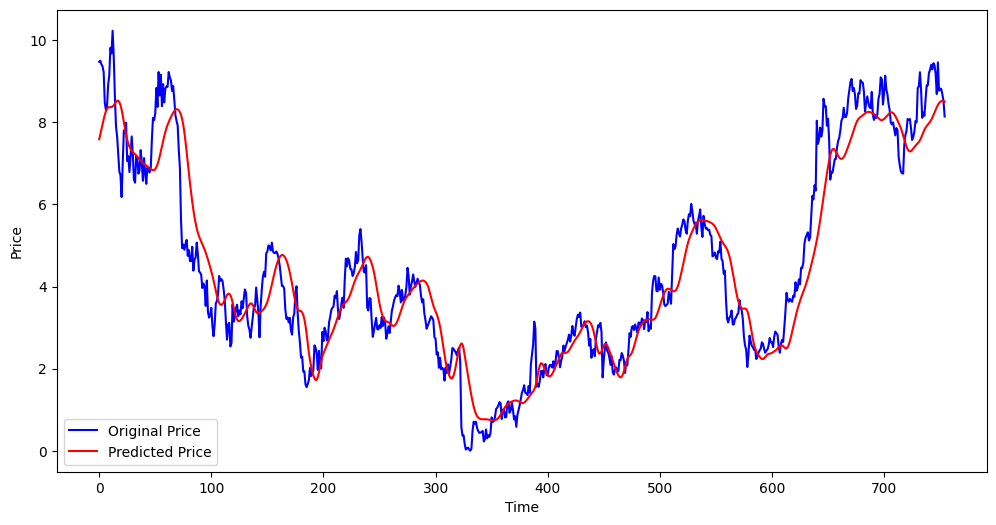

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_perdicated,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()